In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [54]:
!pip install kneed

In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kpi/parameters_m_21.txt', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   partner_id_21         68 non-null     object
 1   pair_21               68 non-null     int64 
 2   val_sku_in_model_21   68 non-null     int64 
 3   val_sku_out_model_21  68 non-null     int64 
 4   diff_model_21         68 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.8+ KB


In [56]:
dfX = df.loc[df.pair_21 == 0, df.columns[-3:]]
dfY  = df.loc[df.pair_21 == 0, df.columns[0]]

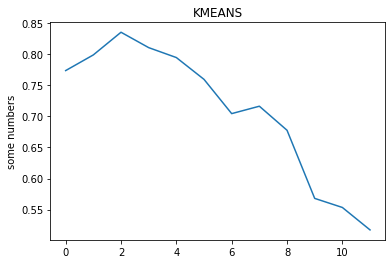

[0.517356249291216, 0.5534559918360861, 0.5680440123643924, 0.6775722078620009, 0.7043345061105207, 0.7162472464468554, 0.7593975980821166, 0.7735318927869403, 0.7944765297621372, 0.798735641194928, 0.8104392981248058, 0.8351718498297311]
[0.7735318927869403, 0.798735641194928, 0.8351718498297311, 0.8104392981248058, 0.7944765297621372, 0.7593975980821166, 0.7043345061105207, 0.7162472464468554, 0.6775722078620009, 0.5680440123643924, 0.5534559918360861, 0.517356249291216]


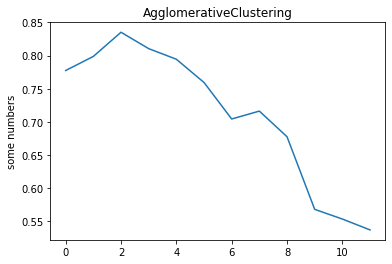

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

class Ml_tools():
  """
  XXX
  """
  def __init__(self, df_X, df_Y):
    self.df_x = df_X
    self.df_y = df_Y

  def scaler(self, mode_scaler):
    """
    XXX
    """
    if mode_scaler == 0:
      return MinMaxScaler().fit_transform(self.df_x)
    elif mode_scaler == 1:
      return StandardScaler().fit_transform(self.df_x)
    else:
      print(f'Wrong parameter')

  def find_n_comps_usePCA(self, df_, exp_var_ = 0.8):
    """
    XXX
    """
    print(f'info -> Use scale or standardize or normalize')
    pca = PCA()
    pca.fit(df_)
    evr = pca.explained_variance_ratio_
    for i, exp_var in enumerate(evr.cumsum()):
      if exp_var >= exp_var_:
        n_comps = i + 1
        break
    print(f"Finding optimal number of components {n_comps}, explained_variance_max {exp_var_}")
    pca = PCA(n_components=n_comps)
    pca.fit(df_)
    scores_pca = pca.transform(df_)
    return scores_pca

  # def kmeans(self, dta, algorithm_='auto', copy_x_=True, init_='k-means++', max_iter_=300,
  #                n_clusters_=3, n_init_=10, n_jobs_=20, precompute_distances_='auto',
  #                random_state_=2020, tol_=0.0001, verbose_=0, max_clusters_=14):
    
    
  #   #clustering

  #   #wcss = list()
  #   silhouette_coef = list()
  #   max_clusters = max_clusters_
  #   for i in range(2, max_clusters):
  #       kmeans_ = KMeans(algorithm=algorithm_, copy_x=copy_x_, init=init_, max_iter=max_iter_,
  #                n_clusters= i, n_init=n_init_, n_jobs=n_jobs_, precompute_distances=precompute_distances_,
  #                random_state=random_state_, tol=tol_, verbose=verbose_)
  #       kmeans_.fit(dta)
  #       #wcss.append(kmeans_.inertia_)
  #       score = silhouette_score(dta, kmeans_.labels_, metric='euclidean')
  #       silhouette_coef.append(score)
  #   #n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
  #   #print("Finding optimal (Elblow) number of clusters", n_clusters)
  #   return wcss, silhouette_coef


  def clustering(self, dta, algorithm_='auto', copy_x_=True, init_='k-means++', max_iter_=300,
                 n_clusters_=3, n_init_=10, n_jobs_=20, precompute_distances_='auto',
                 random_state_=2020, tol_=0.0001, verbose_=0, max_clusters_=14):

    #wcss = list()
    silhouette_coef_kmeans = list()
    silhouette_coef_agglo = list()
    max_clusters = max_clusters_
    for i in range(2, max_clusters):

        # KMEANS
        kmeans_ = KMeans(algorithm=algorithm_, copy_x=copy_x_, init=init_, max_iter=max_iter_,
                 n_clusters= i, n_init=n_init_, n_jobs=n_jobs_, precompute_distances=precompute_distances_,
                 random_state=random_state_, tol=tol_, verbose=verbose_)
        kmeans_.fit(dta)
        # wcss.append(kmeans_.inertia_)
        score = silhouette_score(dta, kmeans_.labels_, metric='euclidean')
        silhouette_coef_kmeans.append(score)

        # AgglomerativeClustering
        cluster_model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='ward')
        cluster_labels = cluster_model.fit_predict(dta)
        silhouette_avg = silhouette_score(dta,cluster_labels,metric='euclidean')
        silhouette_coef_agglo.append(silhouette_avg)

    #n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
    #print("Finding optimal (Elblow) number of clusters", n_clusters)
    return silhouette_coef_kmeans, silhouette_coef_agglo
    

test = Ml_tools(dfX, dfY)

df = test.scaler(1)

metrics = test.clustering(df)

x0 = metrics[0]
x1 = metrics[1]

import matplotlib.pyplot as plt
plt.plot(x0)
plt.ylabel('some numbers')
plt.title('KMEANS')
plt.show()
print(sorted(x0))
print(x0)

plt.plot(x1)
plt.title('AgglomerativeClustering')
plt.ylabel('some numbers')
plt.show()

# n_clusters = KneeLocator([i for i in range(2, 14)], x0, curve='concave', direction='decreasing').knee


# print(n_clusters)
# print(x.index(max(x1)))


# scaled = MinMaxScaler().fit_transform(dfX)
# pca = PCA()
# pca.fit(scaled)
# evr = pca.explained_variance_ratio_
# for i, exp_var in enumerate(evr.cumsum()):
#   if exp_var >= 0.8:
#     n_comps = i + 1
#     break

# n_comps

In [58]:
for i in range(1,14):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
